# CC5215: Privacidad de Datos
## Proyecto grupal - Entregable 2

## Miembros del grupo

Ingrese los nombres de lxs miembros del grupo. Recuerde que el grupo debe tener un máximo de 4 miembros y la constitución del grupo **no se puede cambiar** a lo largo de los distintos entregables.

*   Miembro 1: Tomás Escobar
*   Miembro 2: Diego Espinoza
*   Miembro 3: Jorge Feliú
*   Miembro 4: Lucas Orellana


## Objetivo general
El objetivo de esta primera parte del trabajo grupal es que apliquen técnicas de privacidad diferencial para publicar la mayor información posible, intentando encontrar el buen trade-off entre privacidad y utilidad.

## Reglas

* El documento debe ser **autocontenido** y debe explicar para cada atributo si es númerico o categórico.
* En esta entrega se evaluarán minuciosamente los razonamientos seguidos, y los argumentos detrás de ellos. Justifique lo mejor que pueda cada paso de sus análisis.
* Con el fin de poder evaluar objetivamente sus resultados, su entrega debe indicar **todos** los pasos que siguió (incluyendo los "malos" pasos), especialmente del código.
* Siéntase libre de agregar bloques de código o texto según los necesite. Sin embargo, se le recomienda mantener un mínimo orden en su entrega final.



## P0 (5 puntos)

Cargue su dataset, listo para usarse, y describa cada columna (que vaya a usar), indicando si el atributo es numérico o categórico. Elimine, si corresponde, todas las columnas que no vaya a usar en su entrega.

In [45]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [46]:
import kagglehub
import os
import shutil

path = kagglehub.dataset_download("prasad22/healthcare-dataset")
print("Dataset descargado en:", path)

destino = "/Users/diegoespinoza/Documents/ramos_universidad/Privacidad_de_Datos_CC5215-1/Entregables/Entregable 2/healthcare-dataset"

if os.path.exists(destino):
    shutil.rmtree(destino)

shutil.move(path, destino)
print(f"Dataset movido a: {destino}")

100%|██████████| 2.91M/2.91M [00:00<00:00, 3.77MB/s]

Extracting files...


Dataset descargado en: /Users/diegoespinoza/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2
Dataset movido a: /Users/diegoespinoza/Documents/ramos_universidad/Privacidad_de_Datos_CC5215-1/Entregables/Entregable 2/healthcare-dataset


In [47]:
import pandas as pd
archivos = os.listdir(destino)
print("Archivos en la carpeta:", archivos)

for archivo in archivos:
    if archivo.endswith(".csv"):
        ruta_csv = os.path.join(destino, archivo)
        df = pd.read_csv(ruta_csv)
        print("Archivo cargado:", ruta_csv)
        break

df.head()

Archivos en la carpeta: ['healthcare_dataset.csv']
Archivo cargado: /Users/diegoespinoza/Documents/ramos_universidad/Privacidad_de_Datos_CC5215-1/Entregables/Entregable 2/healthcare-dataset/healthcare_dataset.csv


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [48]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

YOUR ANSWER HERE

## P1 (10 puntos)

Entregue una tabla de contingencia que considere **multiples** columnas y argumente porque podría ser útil para un analista. Por ejemplo, considere que publicar una tabla de contingencia de un solo atributo no es muy útil.

Podemos ver la [siguiente referencia](https://es.khanacademy.org/math/statistics-probability/analyzing-categorical-data/two-way-tables-for-categorical-data/a/two-way-tables-review) de lo que es una tabla de contingencia. Además, nos agarramos de la [página de Kaggle](https://www.kaggle.com/datasets/prasad22/healthcare-dataset?resource=download&select=healthcare_dataset.csv) para nuestro dataset!

In [49]:
import pandas as pd
#Ahora vemos una tabla de contingencia en donde podemos comparar el género para cada una de los tipos de condiciones médicas.
tabla_contingencia = pd.crosstab(df['Gender'], df['Medical Condition'], margins=True)
tabla_contingencia

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity,All
Gender,,,,,,,
Female,4686,4553,4602,4651,4612,4622,27726
Male,4622,4632,4625,4653,4633,4609,27774
All,9308,9185,9227,9304,9245,9231,55500


## P2 (12 puntos)

Defina al menos 3 consultas, de suficiente complejidad que incluyan un promedio, un histograma y valores mas frecuentes. Describa las consultas en lenguaje natural, argumentando por qué dichas consultas son útiles o de interés. Luego escriba el código para realizarlas (sin preservar privacidad).

YOUR ANSWER HERE

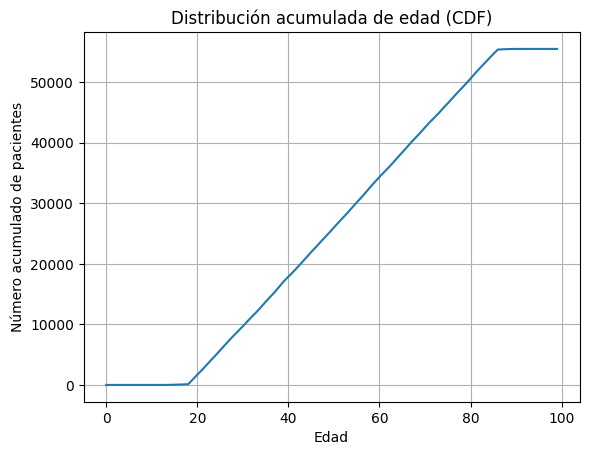

Length of CDF vector: 100


In [50]:
import matplotlib.pyplot as plt

def age_cdf():
    a = df['Age']
    return [len(a[a < i]) for i in range(100)]

plt.plot(age_cdf())
plt.xlabel("Edad")
plt.ylabel("Número acumulado de pacientes")
plt.title("Distribución acumulada de edad (CDF)")
plt.grid(True)
plt.show()

print('Length of CDF vector:', len(age_cdf()))

In [51]:
#La segunda consulta será aquella que nos permite conocer la cantidad de personas con cancer
#que tienen entre 40 y 60 años (a menos que más adelante queramos hacer otra cosa)
def pacientes_con_cancer_en_rango(df, edad_min, edad_max):
    filtro = (
        (df['Medical Condition'].str.lower() == 'cancer') &
        (df['Age'] >= edad_min) &
        (df['Age'] <= edad_max)
    )
    return df[filtro].shape[0]

cantidad = pacientes_con_cancer_en_rango(df, 40, 60)
print(f"Número de pacientes con cáncer entre 40 y 60 años: {cantidad}")


Número de pacientes con cáncer entre 40 y 60 años: 2843


In [52]:
#la tercera consulta será el cálculo del promedio de facturación de pacientes entre 30 y 50 años
filtered = df[(df['Age'] >= 30) & (df['Age'] <= 50)]
avg_billing = filtered['Billing Amount'].mean()

print(f"Promedio de facturación (30-50 años): {avg_billing:.2f}")

Promedio de facturación (30-50 años): 25554.29


## P3 (9 puntos)

Para cada consulta, identifique una noción de métrica de *utilidad* (precisión) que usted considere razonable. Luego implemente las funciones necesarias para medir utilidad.

Considere calcular al menos errores porcentuales.
Tenga en cuenta que los algoritmos DP son no deterministas por lo que debe correr las consultas muchas veces y promediar los errores obtenidos para tener resultados más significativos.

YOUR ANSWER HERE

In [53]:
import numpy as np
#Para la primera consulta usaremos la métrica Mean Absolute Error o MAE:
def mae_cdf(real_cdf, noisy_cdf):
    real_cdf = np.array(real_cdf)
    noisy_cdf = np.array(noisy_cdf)
    return np.mean(np.abs(real_cdf - noisy_cdf))

#Para la consulta de los pacientes con cáncer entre 40 y 60 años usaremos el 
#error absoluto o L1.
def error_absoluto_recuento(real_count, noisy_count):
    return abs(real_count - noisy_count)

#Para la consulta del promedio de facturación de pacientes entre 30 y 50 años
#usaremos el error relativo porcentual:
def error_relativo_promedio(real_mean, noisy_mean):
    if real_mean == 0:
        return np.nan
    return abs(real_mean - noisy_mean) / real_mean * 100


In [54]:
def evaluar_utilidad_dp(num_runs=1000, epsilon_cdf=1.0, epsilon_conteo=1.0, epsilon_promedio=1.0):
    """La función va guardando para 1000 diferentes intentos las tres diferentes consultas
    que son la distribución acumulada de la edad, el conteo de personas con cáncer entre 40 y 60 
    años y el promedio de cantidad de dinero de personas entre 30 y 50 años Además, lo hace usando 
    El mecanismo de Laplace.

    Inputs:
        num_runs (int, optional): es la cantidad de veces que se repite la misma consulta. 
                                  Por defecto será 100.
        epsilon_cdf, epsilon_conteo y epsilon_promedio (float, optional): 
        son los budgets o presupuestos de privacidad de la primer, segunda y tercera consulta
        respectivamente, donde las tres son por 1 por defecto.
    Output: 
        Imprime el promedio de cada una de las tres consultas ruidosas.
    """
    cdf_real = age_cdf()
    count_real = pacientes_con_cancer_en_rango(df, 40, 60)
    promedio_real = df[(df['Age'] >= 30) & (df['Age'] <= 50)]['Billing Amount'].mean()

    errores_mae = []
    errores_conteo = []
    errores_promedio = []

    for _ in range(num_runs):
        ruido_de_cdf = np.random.laplace(loc=0, scale=1/epsilon_cdf, size=len(cdf_real))
        cdf_ruidosa = [max(0, r + n) for r, n in zip(cdf_real, ruido_de_cdf)]
        errores_mae.append(mae_cdf(cdf_real, cdf_ruidosa))

        conteo_ruidoso = count_real + np.random.laplace(loc=0, scale=1/epsilon_conteo)
        errores_conteo.append(error_absoluto_recuento(count_real, conteo_ruidoso))

        promedio_ruidoso = promedio_real + np.random.laplace(loc=0, scale=50.0/epsilon_promedio)
        errores_promedio.append(error_relativo_promedio(promedio_real, promedio_ruidoso))

    print("Consulta 1: Distribución acumulada (CDF)")
    print(f"MAE promedio: {np.mean(errores_mae):.2f}")

    print("Consulta 2: Recuento de pacientes con cáncer (40-60 años)")
    print(f"Error absoluto (L1) promedio: {np.mean(errores_conteo):.2f}")

    print("Consulta 3: Promedio de facturación (30-50 años)")
    print(f"Error porcentual promedio: {np.mean(errores_promedio):.2f}%")

evaluar_utilidad_dp(num_runs=100, epsilon_cdf=1.0, epsilon_conteo=1.0, epsilon_promedio=1.0)

Consulta 1: Distribución acumulada (CDF)
MAE promedio: 0.91
Consulta 2: Recuento de pacientes con cáncer (40-60 años)
Error absoluto (L1) promedio: 0.97
Consulta 3: Promedio de facturación (30-50 años)
Error porcentual promedio: 0.18%


## P4 (12 puntos)

Describa como planea realizar sus consultas de manera diferencialmente privada, incluyendo tanto los mecanismos a usar como la estrategia del uso de budgets de privacidad. Para atributos numéricos, plantéese publicar sumas, máximos, promedios, etc.

Al menos, utilice los macanismos de Laplace y Gauss, y algoritmos como SVT.

Para datos categóricos, plantéese utilizar el Mecanismo Exponencial o Report Noisy Max.

Luego, implemente sus consultas diferencialmente privadas.

YOUR ANSWER HERE

In [55]:
# YOUR CODE HERE

## P5 (9 puntos)

Pruebe distintos epsilons (e.g. $\epsilon = \{0.01, 0.1, 1, \dots, 20\} $) para encontrar un buen trade-off entre privacidad y útilidad (precisión). Proponga un "buen" epsilon para cada analisis. Argumente sus decisiones.

Finalmente, indique el epsilon total requerido en el total de su análisis.

In [56]:
# YOUR CODE HERE

El epsilon total de nuestro analisis fue ..., dado que ...

## P6 (3 puntos)

Escriba una breve conclusión que resuma su experiencia trabajando con su dataset, indicando dificultades y sus decisiones clave.

YOUR ANSWER HERE